# Lab 1 - Part 2: Environmental Data Sets

## *Lab Overview*

This is the second part of Lab 1; it’s purpose is to show you some ways to import real data sets into Python. Real data sets are often large, come in a variety of formats, and can be finicky to deal with. Therefore, it may take you a few tries to get this working: be creative and persistent!

## *Learning Goals*
After this lab you should be able to :
- Load a variety of real data sets into Python
- Create and use a mask to remove missing values from data
- Create a vector of datenumbers using a for-loop
- Generate x-y plots of loaded data with appropriate axes and figure captions

## *To Hand In*

1. A plot of the Mauna Loa CO2 time series.
2. A plot of the MEI index.
3. A plot of the data you downloaded for the pre-lab.
4. A figure caption for the plot of your data set.

## 1. Mauna Loa CO2 time series

First you will make your own plot of the Mauna Loa data which you saw on the first day of class. 

Before you begin, remember to create a new sub-directory (folder) in your Z: drive where you will be able to save all files from this lab session. Ensure MATLAB is working in this directory. **will need to see how we do this for notebooks**


Download the file `monthly_maunaloa_co2.csv` from the class website on Connect. This contains atmospheric CO2 data recorded at the Mauna Loa Observatory. Save the file in the correct directory.

Now open the file in a excel file text editor **original doc has a note on this to use vim?** and observe how the data is organized. Notice the detailed header; we’ll have to tell Python to ignore the header, but you should at least scan it so you know what the data represents. How many header lines are there? What do the columns represent?

First, we are going to load the data from the file into Python with the help of the Pandas Library. Start of by running the cell bellow and importing the library:

In [4]:
import pandas as pd

We will then read and save the data using the pandas.read_csv() function. We will use the following input arguments with this funciton:

- The file name
- the row numbers where the headers are located in the CSV file (note that python is zero-indexed so we will enter the row number from the CSV file -1)
- which rows we dont want to save as column headers or data points

complete the code below and run the cell:

In [5]:
muana_loa_data = pd.read_csv(r"", header= [], skiprows = [])

This snippet of code will create the DataFrame ‘mauna_loa_data’ containing ten columns, one for each column in the CSV file.

DataFrames are data structures in python that resemble spreadsheets. Each row of the DataFrame will be automatically indexed starting at 0, and each column will adopt the header name in the original CSV file. Each cell contains the data for the CSV file in the form of an object as interpreted by python. 

Its a good habit to make sure everything was parsed correctly, there are several functions that may help us when dealing with dataframes. Lets take a look:

In [6]:
#we can print the whole datasets, notice how it resembels a spreadsheet
print(muana_loa_data)

       Yr   Mn      Date        Date       CO2  seasonally          fit  \
0    1958    1     21200   1958.0411    -99.99      -99.99       -99.99   
1    1958    2     21231   1958.1260    -99.99      -99.99       -99.99   
2    1958    3     21259   1958.2027    315.71      314.42       316.18   
3    1958    4     21290   1958.2877    317.45      315.17       317.26   
4    1958    5     21320   1958.3699    317.50      314.75       317.81   
..    ...  ...       ...         ...       ...         ...          ...   
643  2011    8     40770   2011.6219    -99.99      -99.99       -99.99   
644  2011    9     40801   2011.7068    -99.99      -99.99       -99.99   
645  2011   10     40831   2011.7890    -99.99      -99.99       -99.99   
646  2011   11     40862   2011.8740    -99.99      -99.99       -99.99   
647  2011   12     40892   2011.9562    -99.99      -99.99       -99.99   

       seasonally        CO2   seasonally  
0          -99.99     -99.99       -99.99  
1          

Sometimes we dont want to print the whole dataset, especially when dealing with large datasets. We can instead do the following:

In [7]:
#If we put any number n as an input, we can see the first n rows of our data set. 
print(muana_loa_data.head(3))

     Yr   Mn      Date        Date       CO2  seasonally          fit  \
0  1958    1     21200   1958.0411    -99.99      -99.99       -99.99   
1  1958    2     21231   1958.1260    -99.99      -99.99       -99.99   
2  1958    3     21259   1958.2027    315.71      314.42       316.18   

     seasonally        CO2   seasonally  
0        -99.99     -99.99       -99.99  
1        -99.99     -99.99       -99.99  
2        314.89     315.71       314.42  


In [8]:
#if we dont put an input to the function we get the first five rows back as default.
print(muana_loa_data.head())

     Yr   Mn      Date        Date       CO2  seasonally          fit  \
0  1958    1     21200   1958.0411    -99.99      -99.99       -99.99   
1  1958    2     21231   1958.1260    -99.99      -99.99       -99.99   
2  1958    3     21259   1958.2027    315.71      314.42       316.18   
3  1958    4     21290   1958.2877    317.45      315.17       317.26   
4  1958    5     21320   1958.3699    317.50      314.75       317.81   

     seasonally        CO2   seasonally  
0        -99.99     -99.99       -99.99  
1        -99.99     -99.99       -99.99  
2        314.89     315.71       314.42  
3        314.98     317.45       315.17  
4        315.06     317.50       314.75  


In [9]:
#we can use the .head function with input 0 to see the column names
print(muana_loa_data.head(0))

Empty DataFrame
Columns: [  Yr,  Mn,     Date,       Date,      CO2, seasonally,         fit,   seasonally,       CO2,  seasonally]
Index: []


Lets also take a look at how Python interpereted our data, this may be useful later on:

In [10]:
print(muana_loa_data.dtypes) 

  Yr              int64
 Mn               int64
    Date          int64
      Date      float64
     CO2        float64
seasonally      float64
        fit     float64
  seasonally    float64
      CO2       float64
 seasonally     float64
dtype: object


You might notice that our column names have inconsistent spacing. This is because the pandas library will literally read the CSV file. We might want to get rid of these whitespaces to make it easier to access the data later on. We can use the replace function to do so:

In [11]:
#replacing all spaces with an empty string
muana_loa_data.columns = muana_loa_data.columns.str.replace(' ','')

#lets see how our column names look now
print(muana_loa_data.head(0))

Empty DataFrame
Columns: [Yr, Mn, Date, Date, CO2, seasonally, fit, seasonally, CO2, seasonally]
Index: []


Now that we made our DataFrame a bit easier to use we can plot the data with the help of the matplotlib library. Start off by importing the pyplot library:

In [12]:
import matplotlib.pyplot as plt

We can now save the values we want to plot. We are going to take the contents of the cells we are interested in and assign these to their own variables. We want cells 4 and 5, to contain the date and measured CO2. If we look at our outputs from above we can see the respective names are "Date" and "CO2"

In [13]:
#fill in the column names below

co2_date =muana_loa_data[""].values
co2 = muana_loa_data[""].values

#lets take a look at our variables
print()
print()

[[21200.      1958.0411]
 [21231.      1958.126 ]
 [21259.      1958.2027]
 ...
 [40831.      2011.789 ]
 [40862.      2011.874 ]
 [40892.      2011.9562]]
[[-99.99 -99.99]
 [-99.99 -99.99]
 [315.71 315.71]
 ...
 [-99.99 -99.99]
 [-99.99 -99.99]
 [-99.99 -99.99]]


You may notice our co2 and date variable contains two columns. this is because we had two different columns with the same name. lets fix this up and keep only the colums we want **this is an issue with the data**

In [14]:
co2_date = co2_date[:,1]
co2=co2[:,0]

Lets do all this again for the seasonally adjusted data: **lab doesnt ask for this but TA code does do this**

In [15]:
co2sa = muana_loa_data["seasonally"].values
co2sa = co2sa[:,0] # https://stackoverflow.com/questions/40557910/plt-plot-meaning-of-0-and-1 explanation of this notation, good to use in lab 1a
co2fit = muana_loa_data["fit"].values
co2safit = muana_loa_data["seasonally"].values
co2safit = co2safit[:,1]

Now that weve succesfully wrangled all our data, we can finally plot it

<function matplotlib.pyplot.show(close=None, block=None)>

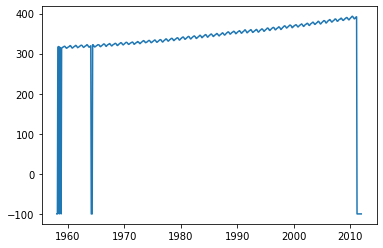

In [16]:
#the first input of our .plot function will be our x axis, the second input will be our y axis
plt.plot() #plotting data

plt.show()

As you can see the pyplot automatically puts x and y ticks, however, we might want to add things such as labels for our axis, a title, or maybe even change the color of the plot

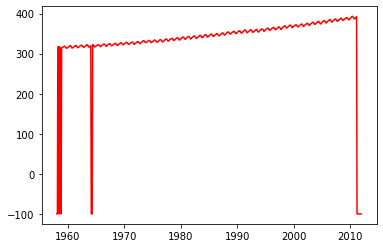

In [17]:
# the 'r' here specifies we want our plot line to be red

plt.plot(co2_date,co2,'r')

In [18]:
#you can have alot more fun with styling, some examples:
'b'    # blue markers with default shape
'or'   # red circles
'-g'   # green solid line
'--'   # dashed line with default color
'^k:'  # black triangle_up markers connected by a dotted line

# take a look at the function documentation for more styling options:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

'^k:'

Lets add our title and axis labels **note plt.show() is not necessary using jupyter. will probably remove, but good to discuss**

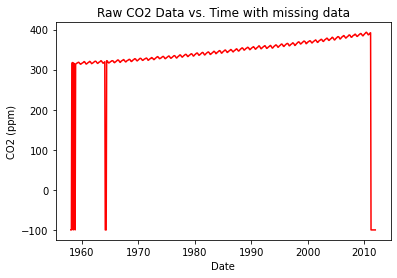

In [19]:
plt.plot(co2_date,co2,'r')
#setting the title
plt.title('Raw CO2 Data vs. Time with missing data')
#setting the x axis label
plt.xlabel('Date')
#setting the yaxis label
plt.ylabel('CO2 (ppm)')

plt.show() 

Notice the negative values in the time series. These are missing values. Go back to the header, determine how missing values are indicated, and remove these from the data set using the masking technique you learned in Part 1 of this lab. Then make a new plot, adding the correct labels on the x- and y-axes.

Save the plot to a PDF or JPG file. Please print and submit this figure.

In [20]:
#import the masking library
import numpy.ma as ma
#importing numpy
import numpy as np

**masking is a bit weird here. my IDE was different, will go over it again.
It seems like the way jupyter is masking the data is different then my IDE/sources online (my idea masks the data, here it seems data is being removed or maybe plot is avoiding the masking)**

In [21]:
co2 = ma.masked_where(co2_date<0,co2)
print(co2) ##looks like values are being removed not masked

[-99.99 -99.99 315.71 317.45 317.5  -99.99 315.86 314.93 313.2  -99.99
 313.33 314.67 315.62 316.38 316.71 317.72 318.29 318.15 316.54 314.8
 313.84 313.26 314.8  315.58 316.43 316.97 317.58 319.02 320.03 319.59
 318.18 315.91 314.16 313.83 315.   316.19 316.93 317.7  318.54 319.48
 320.58 319.77 318.57 316.79 314.8  315.38 316.1  317.01 317.94 318.56
 319.68 320.63 321.01 320.55 319.58 317.4  316.25 315.42 316.69 317.69
 318.74 319.08 319.86 321.39 322.25 321.47 319.74 317.77 316.21 315.99
 317.12 318.31 319.57 -99.99 -99.99 -99.99 322.25 321.89 320.44 318.7
 316.7  316.79 317.79 318.71 319.44 320.44 320.89 322.13 322.16 321.87
 321.39 318.81 317.81 317.3  318.87 319.42 320.62 321.59 322.39 323.87
 324.01 323.75 322.39 320.37 318.64 318.1  319.79 321.08 322.07 322.5
 323.04 324.42 325.   324.09 322.55 320.92 319.31 319.31 320.72 321.96
 322.57 323.15 323.89 325.02 325.57 325.36 324.14 322.03 320.41 320.25
 321.31 322.84 324.   324.42 325.64 326.66 327.34 326.76 325.88 323.67
 322.38 3

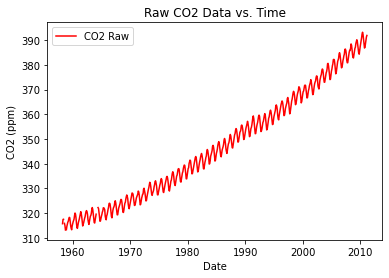

In [27]:
#masking empty entries
co2 = ma.masked_where(co2_date<0,co2) #masking data
co2_date = ma.masked_where(co2<0,co2_date) #TA solution doesnt mask data data. May remove.
co2 = ma.masked_where(co2<0,co2) #masking data
co2_date = ma.masked_where(co2_date<0,co2_date) #TA solution doesnt mask data data. May remove.

#Plot all raw CO2 data with fitted curve overplotted
plt.plot(,,,label='CO2 Raw') #plotting data
plt.title('')
plt.legend()
plt.ylabel('')
plt.xlabel('')
plt.show()

**TA code also plots fitted data on top**

In [ ]:
#masking empty entries
co2fit = ma.masked_where(co2_date<0,co2fit[:631])
co2fit = ma.masked_where(co2<0,co2fit)
co2fit = ma.masked_where(co2fit<0,co2fit)
co2 = ma.masked_where(co2_date[:631]<0,co2) #masking data
co2_date = ma.masked_where(co2<0,co2_date[:631]) #TA solution doesnt mask data data. May remove.
co2 = ma.masked_where(co2<0,co2) #masking data
co2_date = ma.masked_where(co2_date<0,co2_date) #TA solution doesnt mask data data. May remove.


#Plotting all raw CO2 data with fitted curve overplotted
plt.plot(co2_date,co2,'r-',label='CO2 Raw') #plotting data
plt.plot(co2_date,co2fit,'k-',label='CO2 Fit')
plt.title('Raw CO2 Data vs. Time')
plt.legend()
plt.ylabel('CO2 (ppm)')
plt.xlabel('Date')
plt.show()

**TA code also plots seasonally adjusted data**

In [ ]:
#masking data
co2sa = ma.masked_where(co2sa<0,co2sa)
co2safit = ma.masked_where(co2safit<0,co2safit)

#plotting seasonally adjusted CO2 data with fitted curve overplotted
plt.plot(co2_date,co2sa[:631],'g-',label='co2sa') #plotting data
plt.plot(co2_date,co2safit[:631],'k-',label='co2sa')
plt.legend()
plt.title('Seasonally Adjusted CO2 Data vs. Time')
plt.ylabel('CO2 SA fit (ppm)')
plt.xlabel('Date')
plt.show()

## 2. MEI Index
Now we are going to import and plot a time series of the Multivariate ENSO Index (MEI), a climate index which represents the state of the El Niño-Southern Oscillation. The MEI gives an indication of whether the tropical Pacific is in an El Niño (warm water, positive MEI) or a La Niña (cold water, negative MEI) state.

From the class website, download the file MEI.html and place it in your working directory. As before, open the file in a text editor and observe how the raw data is organized. This is always your first step.

Notice, that there are 13 header lines, 63 rows of data, all followed by some useful tips at the end of the file. Each row represents a year and each column a month within that year.

**Original: Though we could again use textscan() to upload the data, we will use a different approach this time. In the future, feel free to use whichever suits you better.**

**should i also try using a differnet method above**

Begin by making a copy of the file and renaming it something like MEI_data_only.txt. Now, in this new file, simply delete all the header lines as well as the trailing information, leaving you with only the 63 lines of data. Make sure to save.
Notice that the last line of data doesn’t contain the same number of columns as all the others. This is because we don’t have data from Aug-Dec 2012.

Don’t worry if the numbers aren’t evenly spaced or if we have missing values, Pandas will take care of everything for us behind the scenes.

Now with a text file containing only data and no extra information, We can load that data using the read_csv function from before, but with slightly different inputs:

In [ ]:
#We will add the sep=’\t’ to specify that our data is separated by \t

#We will add the index_col=0 input so our rows will be named the same as the 0th row on the file.
#with .txt files If we dont do this, Python will automatically number the rows from 0 to n
#and our colum headers will be used as data.

#We will add header=None so the first row of data wont be interpreted as the column names

#fill in the file name to run this code

M = pd.read_csv('', sep='\t',index_col=0,header=None)

With this, M is a matrix containing all the data from the text file. Try printing it to see how it is organized. 

In [ ]:
#print M to see how it was saved

This complete, there are two challenges left before we can plot this data. First, we need to reshape the DataFrame into a one-dimensional array (call this mei) so that it can be plotted. Secondly, since our data only has year information but no month information, we need to create an appropriate array (called dates) the same size as mei to represent the date, both year and month. The first step is quite easy as Python has built-in functions to reshape DataFrames 

In [ ]:
#reshaping array
mei=M.to_numpy().flatten()

#seing whats up
print(mei)

Now that you have a single one-dimensional array containing your data points, you need to make an array holding the corresponding dates. To do this, you can use the method outlined below. But before, a bit about dates in Python

### Dates in Python
In order to make a proper time series in Python, you have to understand a little about how the program stores and displays dates. Python has a module called datetime which allow you to create complex data structures that represent dates. First lets import the module:

In [ ]:
import datetime 

now lets get to know the module: **should this be here or in prelab?**

In [ ]:
#This call returns today’s date. 
print("todays date " + str(datetime.date.today()))

#We can also get the time right now:
print("the time right now " + str(datetime.datetime.now()))

#And finally, we can also create our own datetime object :
x=datetime.datetime(2022,2,2)
print("the date we created is "+ str(x))

#Creating such objects will allow us to have some functionality with our date data, for example we can change dates:
x = x.replace(year=2019)
print("and now it is " + str(x))

Having this sort of functionality is especially important when we want to create a time series. You will see why in following labs.

Lets go ahead and create an array that holds the different dates the data was collected in:

In [ ]:
dates =[]
for i in range(1950,2013):
    for j in range(1,13):
        dates.append(datetime.datetime(i, j, 1))
        
#taking a peak at the data        
print(dates[:5])

 Once we’ve done this, we can make a plot of the MEI index (remember to label your axes) and submit this figure:

In [ ]:
#plot the MEI index here

## 3. Import and Plot Your Data Set
Import the data set you downloaded in the prelab and generate a plot from it.

Since each of the data sets is organized differently, it is up to you to determine how to properly import it. However, feel free to show your data set to a lab TA and discuss challenges associated with importing the different data sets - some data sets are much easier to work with than others are.

Write an python script which will do the following:

- Load the data set you selected in the pre-lab assignment.
- Assign the data to appropriate MATLAB variables.
- Generate a plot of your data with any missing values removed. Give your plot an appropriate title and label your axes, including the correct units. If your data file contains more than one kind of measurement, choose only one variable to plot.

Once the plot is completed, write a caption for the plot. The caption should include:

- A title for the graph
- A description of what data the plot is showing
- Axes labels including the units of the data
- Any information necessary for interpreting the plot correctly.

Captions should be between 15 - 100 words long; the more complicated a plot is, the more description will be needed in the caption.

For example, a figure caption for the first plot we created might look like this: **original pdf doesnt actually have this example**

Figure 1: Atmospheric CO2. CO2 concentrations in parts per million (ppm) recorded at the Mauna Loa Observatory from 1958 - 2011.

             0       1
0    1992.9595  -5.680
1    1992.9866  -7.386
2    1993.0138  -9.084
3    1993.0409 -11.682
4    1993.0681 -11.202
..         ...     ...
827  2016.4426  81.039
828  2016.4697  81.482
829  2016.4969  75.442
830  2016.5240  74.733
831  2016.5512  76.437

[832 rows x 2 columns]
Empty DataFrame
Columns: [0, 1]
Index: []
[1992.9595 1992.9866 1993.0138 1993.0409 1993.0681 1993.0952 1993.1223
 1993.1495 1993.1766 1993.2038 1993.2309 1993.2852 1993.3124 1993.3395
 1993.3667 1993.3938 1993.421  1993.4481 1993.4753 1993.5024 1993.5296
 1993.5839 1993.611  1993.6382 1993.6653 1993.6925 1993.7196 1993.7468
 1993.7739 1993.801  1993.8553 1993.8825 1993.9096 1993.9368 1993.9639
 1993.9911 1994.0182 1994.0454 1994.0725 1994.0997 1994.1268 1994.154
 1994.1811 1994.2354 1994.2626 1994.2897 1994.3169 1994.344  1994.3712
 1994.3983 1994.4255 1994.4526 1994.5069 1994.534  1994.5612 1994.5883
 1994.6155 1994.6426 1994.6698 1994.6969 1994.7241 1994.7512 1994.7784
 1994.8055 1994.8327

<ipython-input-25-77affb21e899>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  M =  pd.read_csv('MSL_Global_1993_2016.txt', sep='\s* ',header=None)


Text(0.5, 1.0, 'Mean Sea Level (MSL) from 1993-2016')

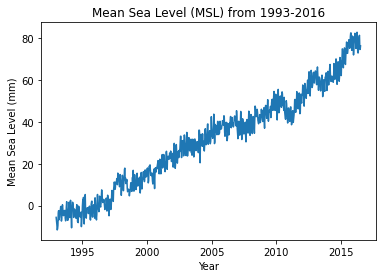

In [25]:
#import the data


#check the data


#make a date variable


#make a MSL variable


#plot the data
